In [1]:
import cv2
import tensorflow as tf
import os
import numpy as np

from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from matplotlib import pyplot as plt

2022-11-23 14:46:51.028848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def build_mnist_model():
    #build model
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    #for classification
    model.add(layers.Flatten()) #to be able to attach Dense layer
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    return model

In [3]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255 #normalize to range [0,1]

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255 #normalize to range [0,1]

#one-hot encoding
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [4]:
model = build_mnist_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

2022-11-23 14:47:09.910169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 16s 16ms/step - loss: 0.1881 - accuracy: 0.9406
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0492 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 20s 22ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0229 - accuracy: 0.9928


In [6]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0322 - accuracy: 0.9896


[0.03217156231403351, 0.9896000027656555]

Text(0.5, 1.0, 'Fourth')

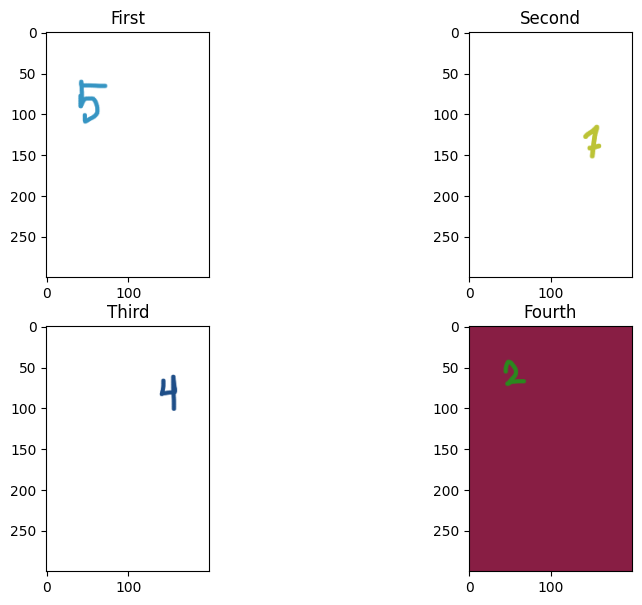

In [7]:
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = cv2.imread("../data/clear/number5.png")
Image2 = cv2.imread("../data/clear/number7.png")
Image3 = cv2.imread("../data/clear/number4.png")
Image4 = cv2.imread("../data/clear/number2.png")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1,'gray')
plt.axis()
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2,"gray")
plt.axis()
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis()
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis()
plt.title("Fourth")

In [8]:
def check_negativ(img):
    if img[0,0]==255:
        return abs(255-img)
    else:
        return img

In [10]:
def isolate_number(img):
    #img=cv2.imread(path,0) #img=cv2.imread('../data/number4.png',0) 
    edges=cv2.Canny(img,50,200) 
    thresh = cv2.threshold(edges,127,255,0)[1]
    contours=cv2.findContours(thresh, 2, 3)[0]
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    #cv2.rectangle(img,(x-5,y-5),(x+w+5,y+h+5),(0,255,0),2)
    cropped = img[y-3:y+h+3, x-3:x+w+3]
    resized=cv2.resize(cropped,(28,28))
    negativ=check_negativ(resized)
    #plt.imshow(negativ,"gray")
    return negativ.reshape(1,28,28,1)

In [11]:
#number=isolate_number(cv2.imread('../data/clear/number4.png',0))

In [13]:
def number2file_clear(img):
    with open("../results/numbers_clean.txt", "a") as file:
    # Writing data to a file
        number = str(tf.math.argmax(tf.squeeze(model(isolate_number(img)))).numpy())
        file.write(':'+number+'\n')

In [14]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

In [15]:
def images2text_clear(folder):
    images=load_images(folder)
    for img in images:
        number2file_clear(img) 
    return print("Numbers are currently written in /results/numbers_clean." )    

In [16]:
images2text_clear("../data/clear")

Numbers are currently written in /results/numbers_clean.


Text(0.5, 1.0, 'Third')

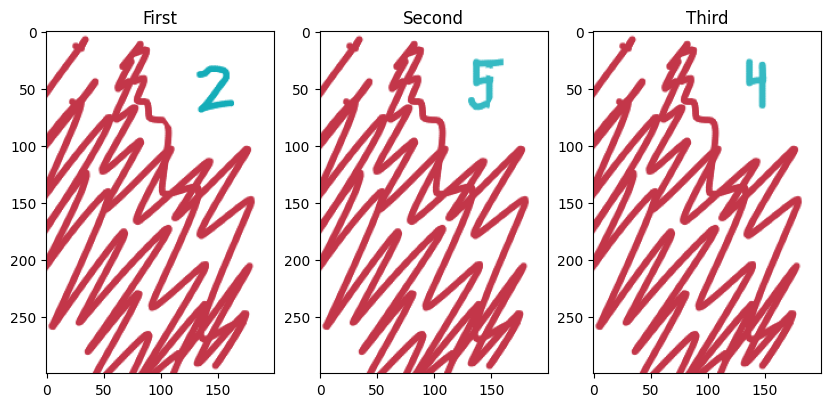

In [17]:
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 3
  
# reading images
Image1 = cv2.imread("../data/mask/mask3.png")
Image2 = cv2.imread("../data/mask/mask2.png")
Image3 = cv2.imread("../data/mask/mask1.png")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1,'gray')
plt.axis()
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2,"gray")
plt.axis()
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis()
plt.title("Third")
  

In [18]:
def identicalcrop(img): 
    cropped=img[18:76,125:165]
    binarize=cv2.threshold(cropped,200,255,0)[1]
    resized=cv2.resize(cropped,(28,28))
    negativ=check_negativ(resized)
    #plt.imshow(negativ,"gray")
    return negativ.reshape(1,28,28,1)

In [ ]:
#identicalcrop(cv2.imread("../data/mask/mask1.png",0))

In [19]:
def number2file_dirty(img):
    with open("../results/numbers_dirty.txt", "a") as file:
    # Writing data to a file
        number = str(tf.math.argmax(tf.squeeze(model(identicalcrop(img)))).numpy())
        file.write(':'+number+'\n')

In [20]:
#number2file_dirty(cv2.imread("../data/mask/mask2.png",0))

In [21]:
def images2text_dirty(folder):
    images=load_images(folder)
    for img in images:
        number2file_dirty(img) 
    return print("Numbers are currently written in /results/numbers_dirty.txt." )  

In [22]:
images2text_dirty("../data/mask")

Numbers are currently written in /results/numbers_dirty.txt.


Text(0.5, 1.0, 'Third')

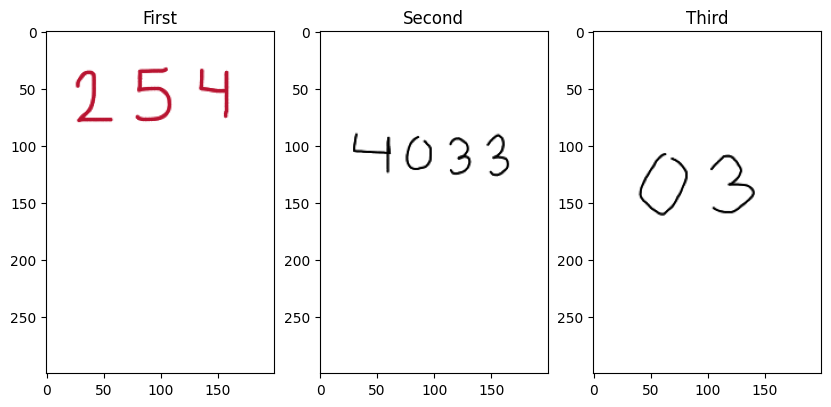

In [44]:
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 3
  
# reading images
Image1 = cv2.imread("../data/multiple_digits/multi1.png")
Image2 = cv2.imread("../data/multiple_digits/multi4.png")
Image3 = cv2.imread("../data/multiple_digits/multi3.png")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1,'gray')
plt.axis()
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2,"gray")
plt.axis()
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis()
plt.title("Third")
  

In [23]:
def image_preprocess(img):
    #img=cv2.imread(path,0)
    #img=cv2.imread("../data/multiple_digits/multi1.png")
    #img=cv2.imread("../data/mask/mask1.png")
    bin_img=cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1] #binarize
    inverted_img =cv2.bitwise_not(bin_img) #inverted
    kernel=np.ones((1,1),np.uint8) #kernel
    img_dilation=cv2.dilate(inverted_img,kernel,iterations=1) #dilation
    edges=cv2.Canny(img_dilation,30,200) #find edges
    kernel=np.ones((4,4),np.uint8)
    final_form=cv2.dilate(edges,kernel,iterations=1)
    return final_form

In [42]:
#plt.imshow(image_preprocess("../data/multiple_digits/multi4.png"),"gray")

In [807]:
#img_prepro=image_preprocess("../data/multiple_digits/multi4.png")

In [35]:
def separatenumbers2list(img_prepro):
    thresh = cv2.threshold(img_prepro,127,255,cv2.THRESH_BINARY)[1]
    contours,hierarchy = cv2.findContours(thresh, 2, 3)
    cnts=sorted(contours,key=cv2.boundingRect)
    image_list=[]
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        ROI=img_prepro[y-5:y+h+5,x-5:x+w+5]
        resized_ROI=cv2.resize(ROI,(28,28))
        bin_img=cv2.threshold(resized_ROI,127,255,cv2.THRESH_BINARY)[1]
        image_list.append(bin_img.reshape(1,28,28,1))
    return image_list

In [36]:
#images=separatenumbers2list(img_prepro)

In [37]:
#tf.math.argmax(tf.squeeze(model(separatenumbers2list(img)[1]))).numpy()

In [38]:
def numbers2file(img):
    numbers_list=[]
    for number in separatenumbers2list(img):
        numbers_list.append(tf.math.argmax(tf.squeeze(model(number))).numpy())
    #Writing data to a file
    with open("../results/multiple_numbers.txt", "a") as file:
        file.write("".join(str(datapoint) for datapoint in numbers_list))
        file.write("\n")
    return numbers_list

In [39]:
#numbers2file(img)

In [40]:
def images2text_multi(folder):
    images=load_images(folder)
    for img in images:
        numbers2file(image_preprocess(img)) 
    return print("")

In [41]:
images2text_multi("../data/multiple_digits/")